# Notebook to examine performance across dataset, rather than looking reach by reach



In [17]:
from pathlib import Path
import os,sys,json
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [18]:
sys.path.append('src')
from Utils import getresultdf

In [19]:
def ploteCDFs(dfs,variable,names):
    fig = go.Figure()
    
    i=0
    for df in dfs:
        xval=df[variable].sort_values()
        yval=np.linspace(0,1,len(xval))
        fig.add_trace(go.Scatter(x=xval,y=yval,name=names[i]))
        i+=1

    fig.update_layout(
        xaxis_range=[0,1.5],
        xaxis_title="67th percentile ε",
        yaxis_title='empirical CDF',
        width=800,
        height=400
    )
    
    fig.show()
    
    

In [20]:
def plotbarn(dfs,expnames):
    
    dfns=[]
    i=0
    for df in dfs:
        dfns.append(pd.DataFrame(data={'n':[len(df)],'name':[expnames[i]],'type':['reach'] }))
        dfns.append(pd.DataFrame(data={'n':[df['n'].sum()],'name':[expnames[i]],'type':['times'] }))
        i+=1
        
    dfn=pd.concat(dfns)
        
    # return dfn
    
    fig=px.bar(dfn,x='name',y='n',facet_col='type',barmode='group')
    fig.update_yaxes(matches=None)
    fig.update_yaxes(showticklabels=True, col=2) # assuming second facet
    
    
    fig.show()

## Read Experiment List


In [21]:
ExpDataDir=Path('ExperimentData')

In [22]:
expdf=pd.read_csv(ExpDataDir.joinpath('experimentlog.csv'),index_col=0)
expdf

expsid    expid                          reachdomain  swotsource slopedata  \
0   exps1   exp1-1  connecticut+willamette calval gages  hydrochron     slope   
1   exps1   exp1-2  connecticut+willamette calval gages  hydrochron    slope2   
2   exps1   exp1-3  connecticut+willamette calval gages  hydrochron     slope   
3   exps1   exp1-4  connecticut+willamette calval gages  hydrochron     slope   
4   exps1   exp1-5  connecticut+willamette calval gages  hydrochron     slope   
5   exps1   exp1-6  connecticut+willamette calval gages  hydrochron     slope   
6   exps1   exp1-7  connecticut+willamette calval gages  hydrochron     slope   
7   exps1   exp1-8  connecticut+willamette calval gages  hydrochron     slope   
8   exps1   exp1-9  connecticut+willamette calval gages  hydrochron     slope   
9   exps2   exp2-1                           usgs gages  hydrochron     slope   
10  exps2   exp2-3                           usgs gages  hydrochron     slope   
11  exps2   exp2-4                           usgs gages  hydrochron     slope   
12  exps2   exp2-5                           usgs gages  hydrochron     slope   
13  exps2   exp2-6                           usgs gages  hydrochron     slope   
14  exps2   exp2-8                           usgs gages  hydrochron     slope   
15  exps2   exp2-9                           usgs gages  hydrochron     slope   
16  exps2  exp2-10                           usgs gages  hydrochron     slope   
17  exps2  exp2-11                           usgs gages  hydrochron     slope   
18  exps3   exp3-1  connecticut+willamette calval gages     ADT-pvd     slope   

    slopeminimum  slopeconsistencycheck areaopt  constrainhw flowlaw  \
0            NaN               0.000000      fd        False   MWAPN   
1            NaN               0.000000      fd        False   MWAPN   
2       0.000017              -1.000000      fd        False   MWAPN   
3       0.000034              -1.000000      fd        False   MWAPN   
4            NaN               0.000017      fd        False   MWAPN   
5            NaN               0.000000      fh        False   MWAPN   
6            NaN               0.000000      fh         True   MWAPN   
7            NaN               0.000000      fd        False    AHGD   
8            NaN               0.000000      fd        False   MWAPN   
9            NaN               0.000000      fd        False   MWAPN   
10      0.000017              -1.000000      fd        False   MWAPN   
11      0.000034              -1.000000      fd        False   MWAPN   
12           NaN               0.000017      fd        False   MWAPN   
13           NaN               0.000000      fh        False   MWAPN   
14           NaN               0.000000      fd        False    AHGD   
15           NaN               0.000000      fd        False   MWAPN   
16           NaN               0.000000      fd        False    AHGW   
17           NaN               0.000000      fd        False    AHGD   
18           NaN               0.000000      fd        False   MWAPN   

    darkfracmax  
0           0.4  
1           0.4  
2           0.4  
3           0.4  
4           0.4  
5           0.4  
6           0.4  
7           0.4  
8           0.2  
9           0.4  
10          0.4  
11          0.4  
12          0.4  
13          0.4  
14          0.4  
15          0.2  
16          0.4  
17          0.2  
18          0.4

## Analyze baseline performance

In [23]:
idx=0 #baseline
resultdf=getresultdf(idx,expdf,ExpDataDir)
len(resultdf)

9

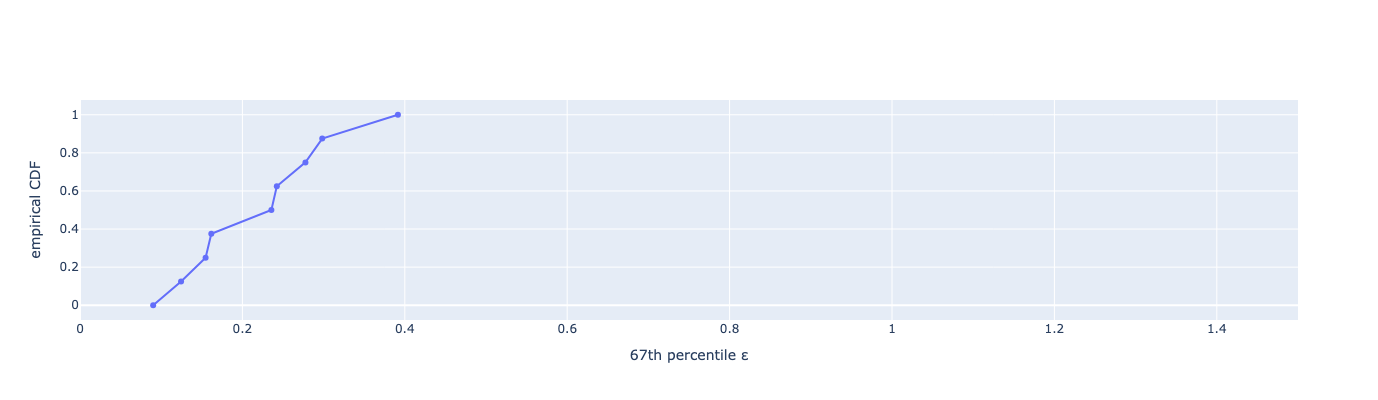

In [24]:
# px.ecdf(resultdf,x='anr67',range_x=[0,1.5]) #use built in ecdf function
ploteCDFs([resultdf],'anr67',['baseline'])

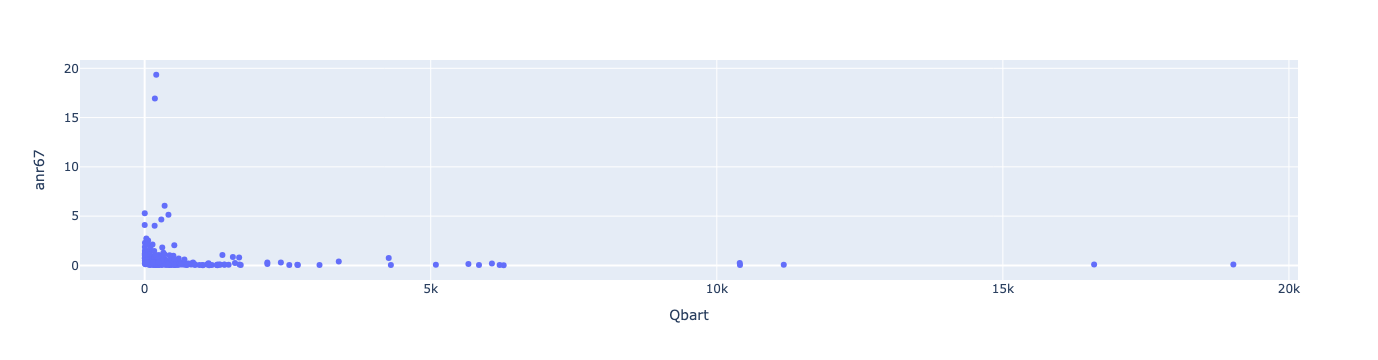

In [9]:
px.scatter(resultdf,x='Qbart',y='anr67')

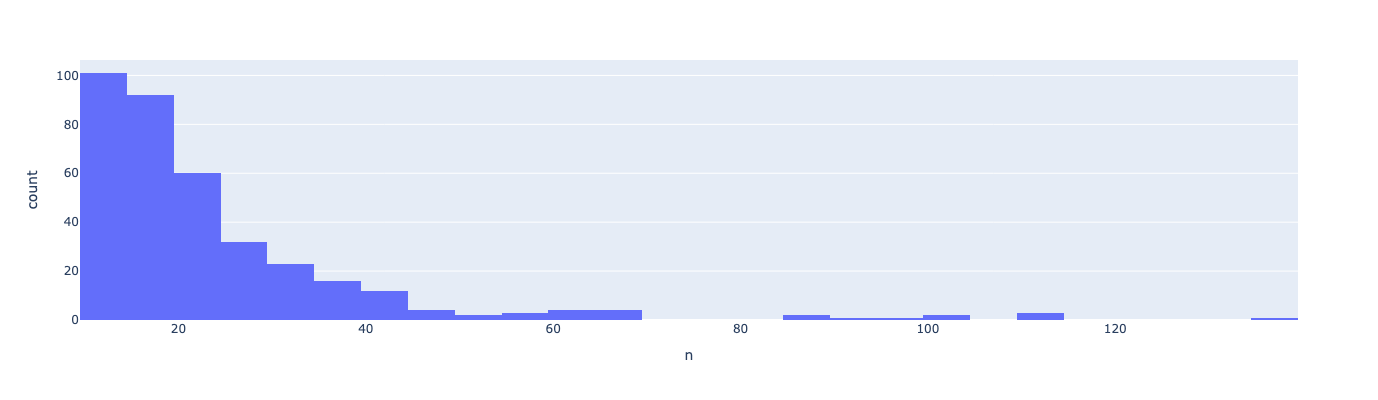

In [10]:
px.histogram(resultdf,x='n',width=400,height=400)

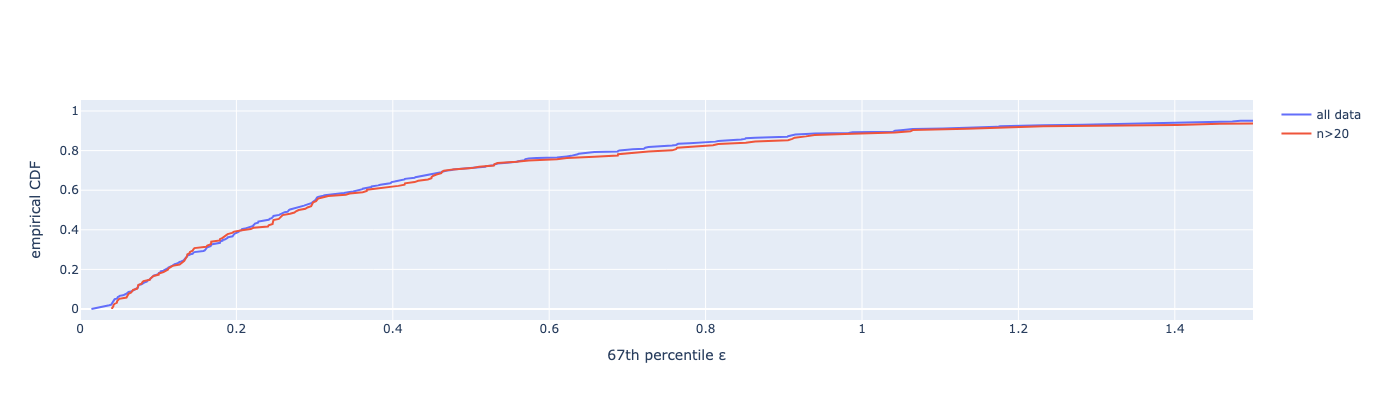

In [11]:
ploteCDFs([resultdf,resultdf[resultdf['n']>20]],'anr67',['all data','n>20'])

In [16]:
resultdf.sort_values(by='anr67',ascending=False).iloc[20]

na             0.008704
A0            58.834035
x1             0.955842
RMSE          27.493521
rRMSE          1.671406
nRMSE          1.021118
NSE            0.424247
VE             0.343449
bias           1.949655
stdresid      27.424306
nbias          0.067521
MSC            0.357089
meanLogRes     0.308699
stdLogRes      0.791967
meanRelRes     0.848255
stdRelRes      1.440160
r              0.656450
KGE            0.423940
anr67          1.409885
nMAE           0.656551
Qbart         26.924924
n             13.000000
Name: 74270400051, dtype: float64

In [14]:
fname='gage-data/gagereaches.json'
with open(fname) as gfile:
    gagedata=json.load(gfile)

In [15]:
resultdf['width']=0.
resultdf['slope']=0.
for index,rows in resultdf.iterrows():
    resultdf.at[index,'width']=gagedata[str(index)]['width']
    resultdf.at[index,'slope']=gagedata[str(index)]['slope']

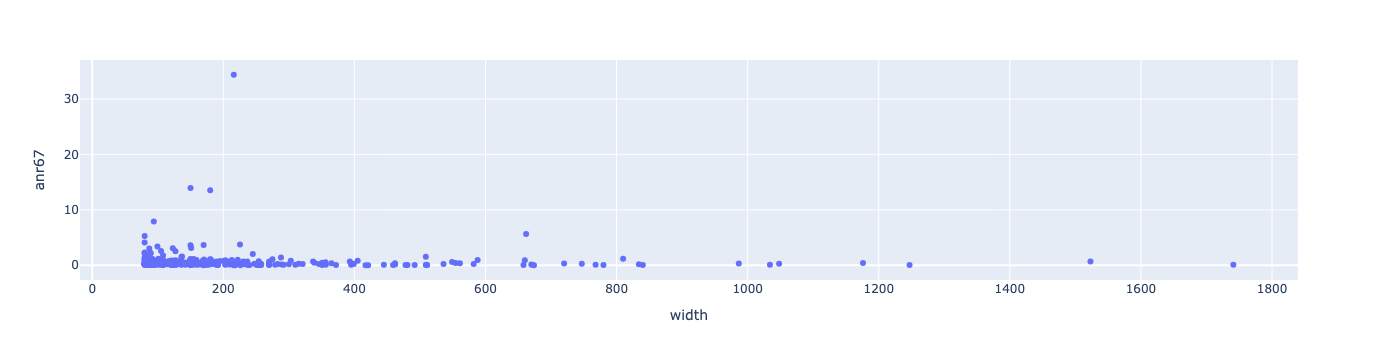

In [16]:
px.scatter(resultdf,x='width',y='anr67')

In [11]:
# boxdf=resultdf[resultdf['anr67']<1.5]


# fig = go.Figure()
# fig.add_trace(go.Box(y=boxdf['anr67'],boxpoints='all'))

# fig.show()

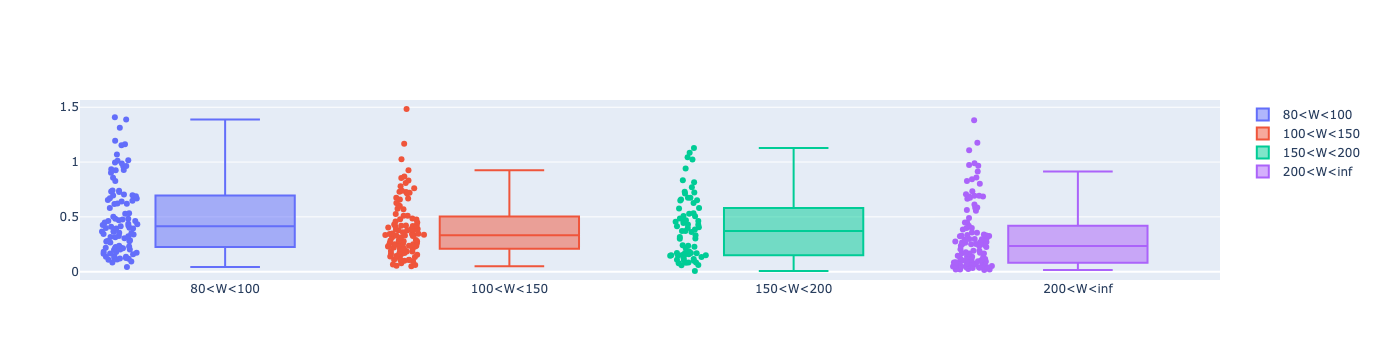

In [18]:
# look at error by width class
width_classes=[80,100,150,200,np.inf]
fig = go.Figure()
for i in range(len(width_classes)-1):
    plotdf=boxdf[ (boxdf['width']>width_classes[i]) & (boxdf['width']<width_classes[i+1]) ]
    classname=str(width_classes[i]) +'<W<'+str(width_classes[i+1])
    fig.add_trace(go.Box(y=plotdf['anr67'],boxpoints='all',name=classname))
fig.show()

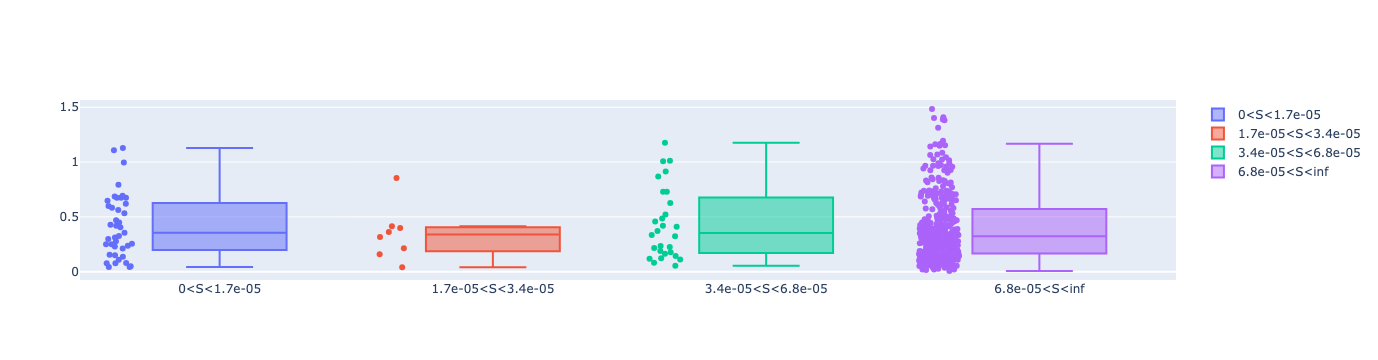

In [19]:
# look at error by slope class
slope_classes=[0,1.7e-5,3.4e-5,6.8e-5,np.inf]
fig = go.Figure()
for i in range(len(slope_classes)-1):
    plotdf=boxdf[ (boxdf['slope']>slope_classes[i]) & (boxdf['slope']<slope_classes[i+1]) ]
    classname=str(slope_classes[i]) +'<S<'+str(slope_classes[i+1])
    fig.add_trace(go.Box(y=plotdf['anr67'],boxpoints='all',name=classname))
fig.show()

In [20]:
plotdf

na          A0        x1        RMSE     rRMSE     nRMSE  \
73150600431  0.028811  149.346599  0.499896   30.953238  0.581803  0.329682   
78310800021  0.016631  198.224985  0.650410   40.407859  0.123646  0.110844   
78297000061  0.015239  110.257963  0.940115   37.048479  0.160978  0.192353   
78220000221  0.006262  323.709541  0.796357  119.626744  0.354084  0.257008   
74252500101  0.007343  329.031595  0.926628   63.532589  0.178456  0.106682   
...               ...         ...       ...         ...       ...       ...   
73150600181  0.024127  382.860177  0.590915   40.748299  0.265365  0.165043   
73120000521  0.023761  236.243613  0.488060   40.054645  0.417384  0.266323   
81140700041  0.027026  422.742831  0.526570   42.855439  0.069795  0.069079   
74268300081  0.011077  166.291354  0.432608  239.312937  1.261139  0.766110   
74292100141  0.077202  181.624806 -0.171228    6.961306  0.245414  0.207987   

                  NSE        VE      bias    stdresid  ...  meanRelRes  \
73150600431  0.781506  0.776299 -0.532651   30.948655  ...    0.089698   
78310800021  0.920971  0.916423 -0.082578   40.407775  ...    0.007379   
78297000061  0.480270  0.867423  0.094028   37.048360  ...    0.023825   
78220000221  0.823531  0.816940  0.489747  119.625741  ...    0.055862   
74252500101  0.944982  0.908970  2.657288   63.476994  ...    0.016786   
...               ...       ...       ...         ...  ...         ...   
73150600181  0.917924  0.879495 -0.730074   40.741758  ...   -0.001782   
73120000521  0.808729  0.782238 -0.133856   40.054422  ...    0.103320   
81140700041  0.956008  0.945380 -0.263065   42.854632  ...   -0.000803   
74268300081  0.329819  0.382042 -4.106998  239.277693  ...    0.578075   
74292100141  0.748313  0.826628 -0.097539    6.960622  ...    0.035939   

             stdRelRes         r       KGE     anr67      nMAE       Qbart  \
73150600431   0.574846  0.884148  0.848093  0.276802  0.223701   93.888270   
78310800021   0.123426  0.959674  0.944182  0.091015  0.083577  364.545540   
78297000061   0.159205  0.693089  0.558562  0.158285  0.132577  192.607080   
78220000221   0.349650  0.907493  0.866268  0.161694  0.183060  465.459347   
74252500101   0.177665  0.972417  0.938647  0.152565  0.091030  595.531844   
...                ...       ...       ...       ...       ...         ...   
73150600181   0.265360  0.958140  0.948527  0.144774  0.120505  246.895016   
73120000521   0.404394  0.899299  0.860011  0.316110  0.217762  150.398713   
81140700041   0.069791  0.977765  0.971491  0.076760  0.054620  620.378744   
74268300081   1.120849  0.574887  0.421311  0.973820  0.617958  312.374263   
74292100141   0.242768  0.865283  0.824133  0.190948  0.173372   33.469962   

                 n  width     slope  
73150600431   88.0   94.0  0.001297  
78310800021   21.0  150.0  0.000257  
78297000061   31.0   88.0  0.000540  
78220000221  106.0   80.0  0.000142  
74252500101   22.0  157.0  0.000072  
...            ...    ...       ...  
73150600181  114.0  152.0  0.000770  
73120000521   67.0   92.0  0.000843  
81140700041   23.0  177.0  0.002955  
74268300081   35.0  213.0  0.000153  
74292100141   13.0  234.0  0.000360  

[347 rows x 24 columns]

## Compare treatments


### Compare USGS and cal-val

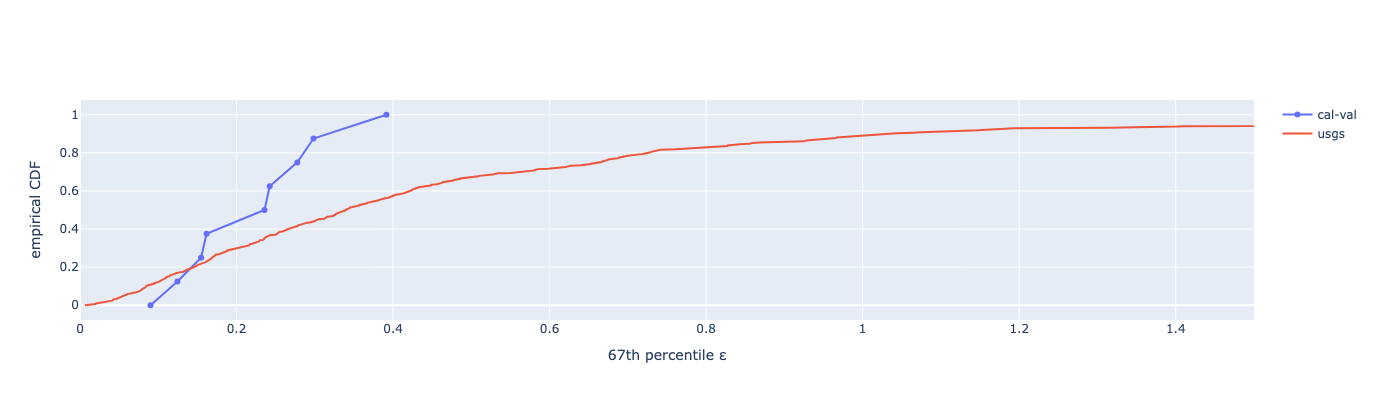

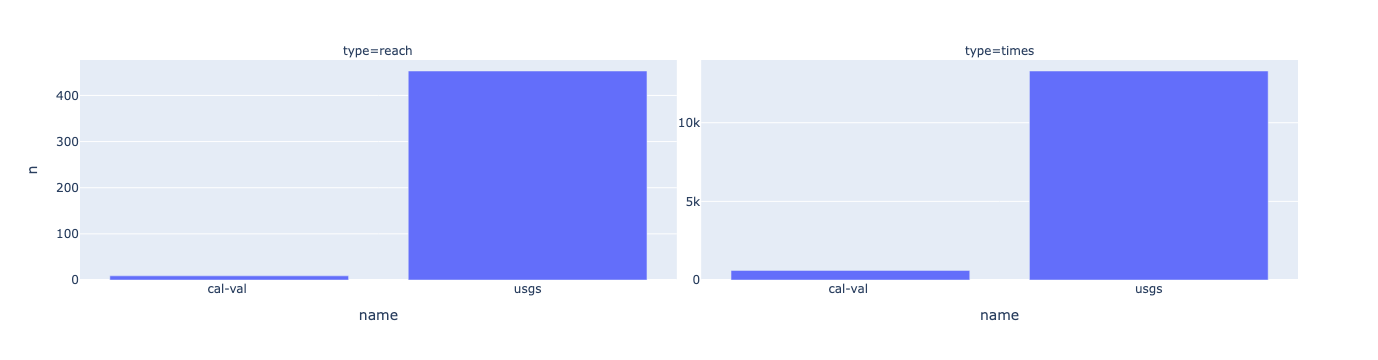

In [10]:
idxs=[0,9] #baseline 
expnames=['cal-val ','usgs']
resultdfs=[]
for idx in idxs:
    resultdfs.append(getresultdf(idx,expdf,ExpDataDir))
ploteCDFs(resultdfs,'anr67',expnames)
plotbarn(resultdfs,expnames)

### Compare effect of dark water limit

In [21]:
idxs=[0,9,15] #baseline + dark water limit
expnames=['cal-val baseline','usgs baseline','usgs with darkfracmax=0.2']
resultdfs=[]
for idx in idxs:
    resultdfs.append(getresultdf(idx,expdf,ExpDataDir))

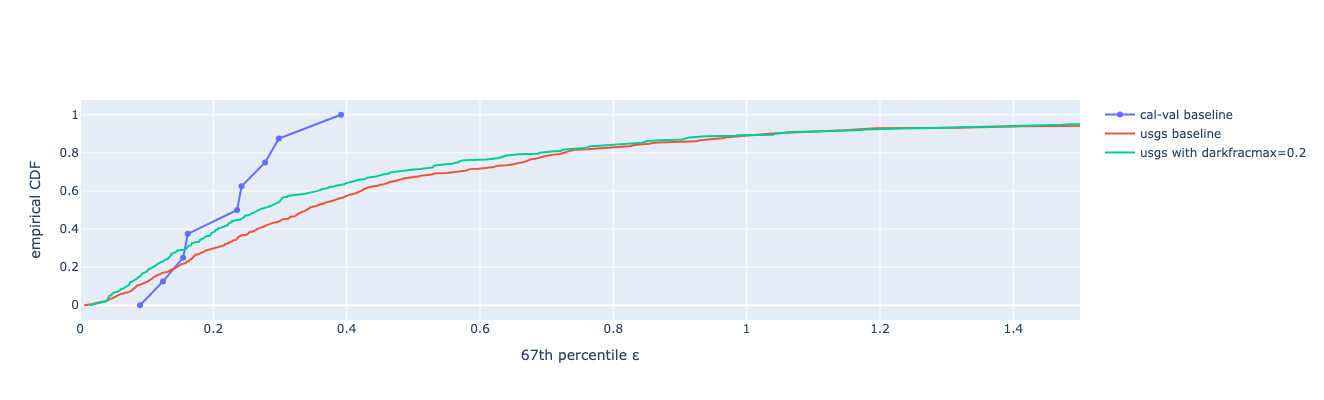

In [22]:
ploteCDFs(resultdfs,'anr67',expnames)

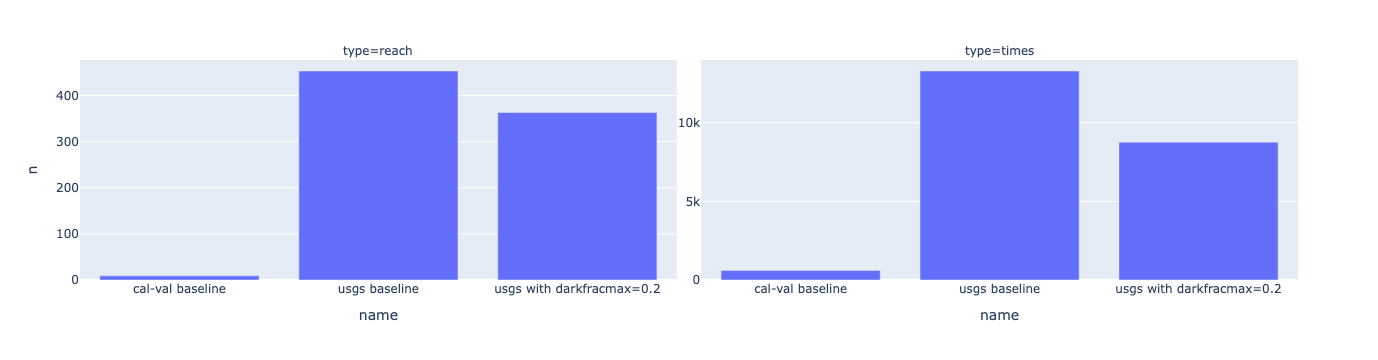

In [23]:
plotbarn(resultdfs,expnames)

### Compare effect of low slope treatment

In [24]:
idxs=[0,9,10,11,12] #baseline + low slope 
expnames=['cal-val baseline','usgs baseline','usgs slope min 1.7 cm/km','usgs slope 3.4 cm/km','mixed 1.7 cm/km']
resultdfs=[]
for idx in idxs:
    resultdfs.append(getresultdf(idx,expdf,ExpDataDir))

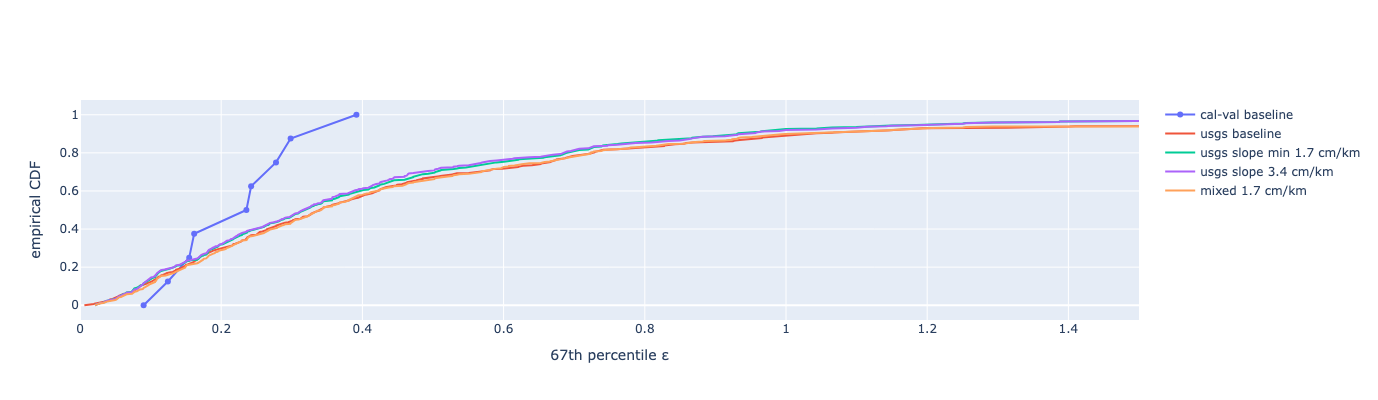

In [25]:
ploteCDFs(resultdfs,'anr67',expnames)

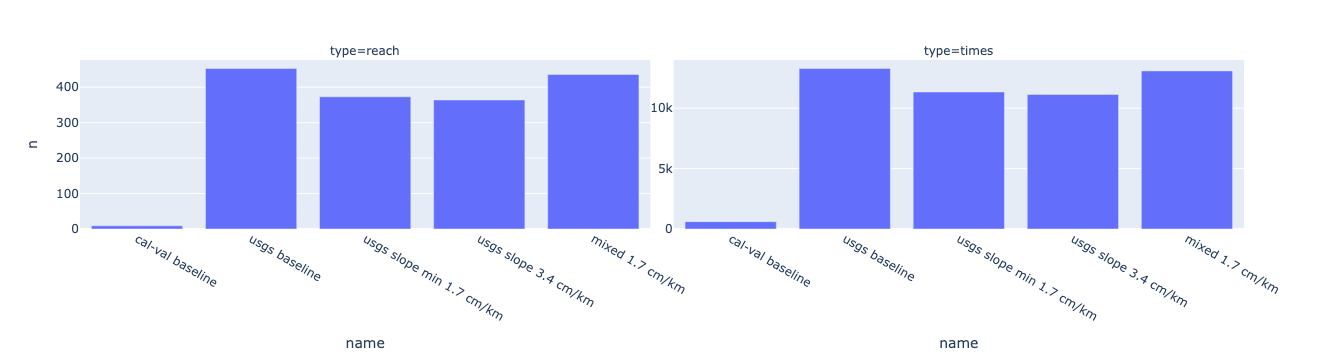

In [26]:
plotbarn(resultdfs,expnames)

### Compare flow laws

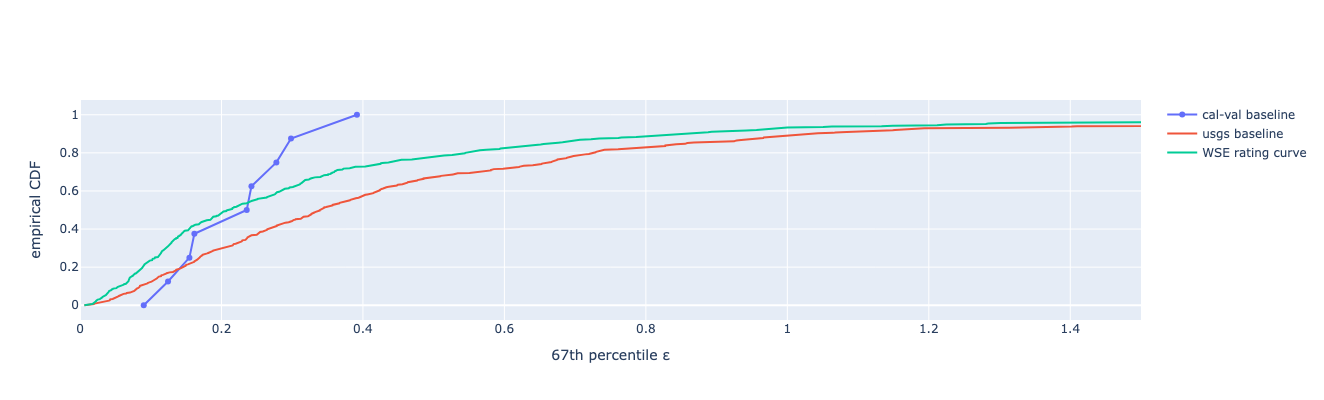

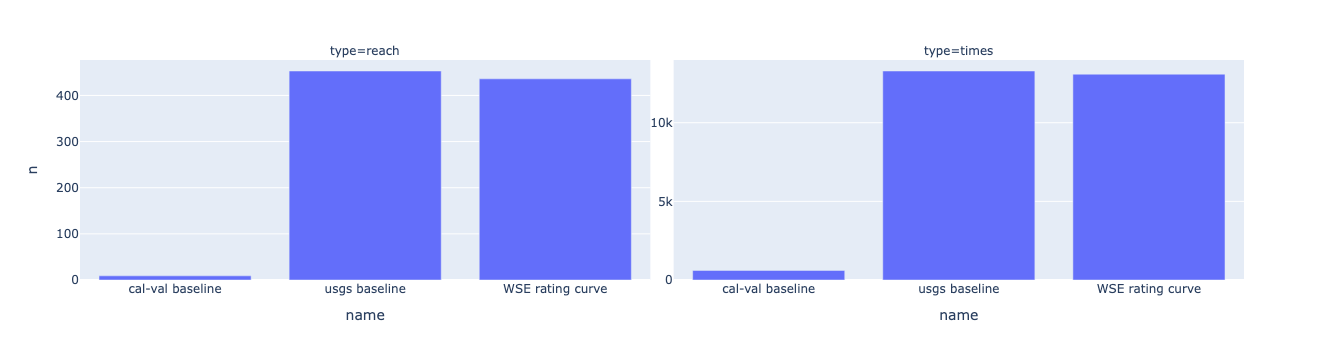

In [27]:
idxs=[0,9,14] #baseline + rating curve
expnames=['cal-val baseline','usgs baseline','WSE rating curve']
resultdfs=[]
for idx in idxs:
    resultdfs.append(getresultdf(idx,expdf,ExpDataDir))

ploteCDFs(resultdfs,'anr67',expnames)
plotbarn(resultdfs,expnames)

## Flow law + dark water filter

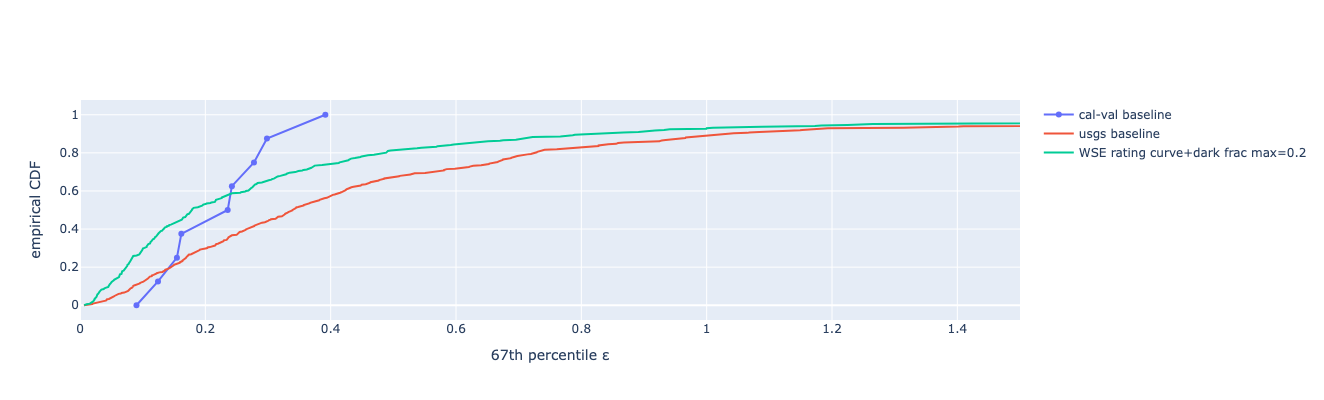

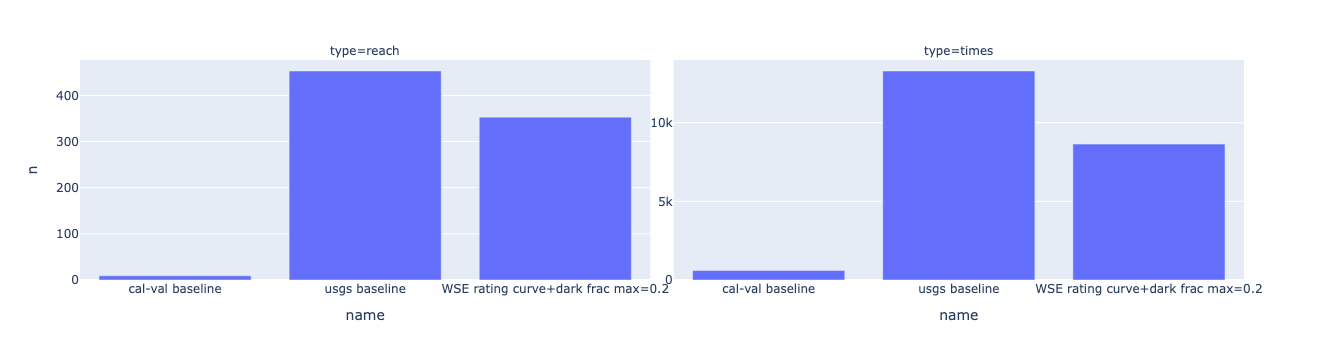

In [29]:
idxs=[0,9,17] #baseline + rating curve
expnames=['cal-val baseline','usgs baseline','WSE rating curve+dark frac max=0.2']
resultdfs=[]
for idx in idxs:
    resultdfs.append(getresultdf(idx,expdf,ExpDataDir))

ploteCDFs(resultdfs,'anr67',expnames)
plotbarn(resultdfs,expnames)

In [33]:
resultdf=getresultdf(17,expdf,ExpDataDir)

In [34]:
resultdf['width']=0.
resultdf['slope']=0.
for index,rows in resultdf.iterrows():
    resultdf.at[index,'width']=gagedata[str(index)]['width']
    resultdf.at[index,'slope']=gagedata[str(index)]['slope']

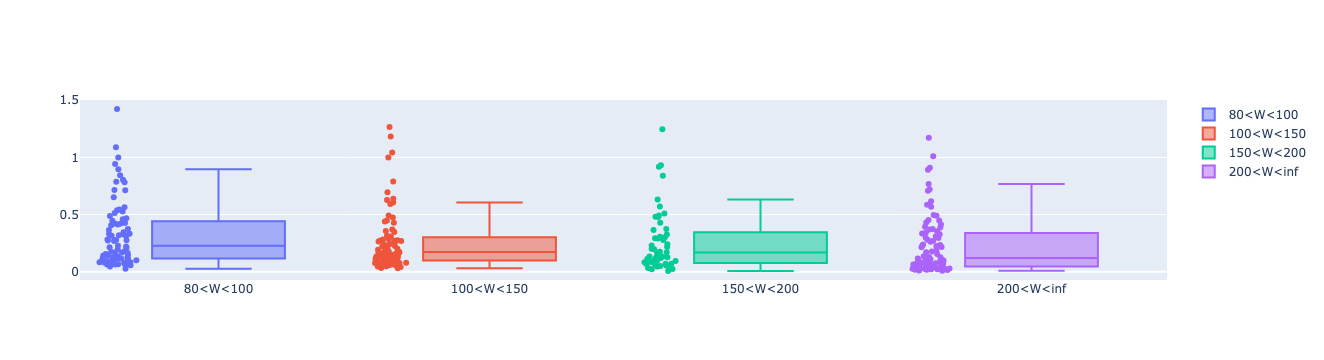

In [36]:
# look at error by width class
boxdf=resultdf[resultdf['anr67']<1.5]
width_classes=[80,100,150,200,np.inf]
fig = go.Figure()
for i in range(len(width_classes)-1):
    plotdf=boxdf[ (boxdf['width']>width_classes[i]) & (boxdf['width']<width_classes[i+1]) ]
    classname=str(width_classes[i]) +'<W<'+str(width_classes[i+1])
    fig.add_trace(go.Box(y=plotdf['anr67'],boxpoints='all',name=classname))
fig.show()